<div class="alert alert-block alert-success">
    

## <center> Dynamic Programming  </center>


</div>
    
    

<div class="alert alert-info">



        


Go to this website and choose one of the Top 20 Dynamic Programming Interview Questions for this assignment.  https://www.geeksforgeeks.org/top-20-dynamic-programming-interview-questions/ (Links to an external site.)
    Implement the Dynamic Programming algorithm in Python (it's ok to use the code that's on the webpage) and use it to solve a range of scenarios.  Make sure you are using a Dynamic Programming solution (not another one)
    Explain what is being done in the implementation.  That is, document the walkthrough and the run  of the algorithm and explain how it is a Dynamic Programming solution.




Write the python implementation for the problem you selected, run it, and record the solution that your algorithm implmentation produces.  Please answer the following questions regarding your solution:
- Explain the problem in detail. 
- What is the complexity of your solution?
- Did your implmentation provide the best solution or could there be an alternative/better solution to the  problem you selected?  - Why or why not?



    
</div>


### Discuss and Analyze the Dynamic Programming Problem

#### Selected problem: 
Egg Dropping Puzzle (ref: https://www.geeksforgeeks.org/egg-dropping-puzzle-dp-11/)

#### Description: 
* We wish to know which floors in a `k`-story building are safe to drop eggs from, and which floors will cause the eggs to break on landing. We have `n` eggs. What is the least number of egg-droppings we need to perform to find this critical/threshold floor?


* Stated differently: <b>Given a building with `k` floors and `n` eggs, what is the minimum number of trials required to find the critical floor (above which eggs will break and below which eggs will not break)?</b> 


* Note: the problem is not to find the critical floor but to determine the least amount of egg drops to find the critical floor.


#### Assumptions:
* An egg that survives a fall can be used again. 
* A broken egg must be discarded. 
* The effect of a fall is the same for all eggs. 
* If an egg breaks when dropped, then it would break if dropped from a higher floor. 
* If an egg survives a fall then it would survive a shorter fall. 



For example, if only one egg is available, the solution would be to drop the egg from the first floor, and if it doesn’t break, continue upward until it breaks. In the worst case, this method requires `k` droppings where `k` = number of floors. (For 1 egg and `k` floors, we need `k` trials; this is one of the base cases.)

#### Solving the problem using recursion:

* Using recursion, the strategy would be to drop the egg from every floor (from 1 to `k`) and recursively calculate the minimum number of trials needed in the worst case. (Here, the worst case scenario is when we are sure of the critical floor. For example, if we randomly pick a floor and the egg breaks, we are not sure if it would break from any of the floors below. This would not be the worst case.) 


* The problem has a optimal substructure: when we drop an egg from the `x`th floor, there are 2 cases:
    * Case 1: the egg breaks. Then we only need to check floors lower than `x` with the remaining eggs, reducing the problem to `x-1` floors and `n-1` eggs.
    * Case 2: the egg does not break. Then we only need to check floors higher than `x`, reducing the problem to `k-x` floors and `n` eggs.
    
    
* Since the goal is to minimize the number of trials in worst case, we take the maximum of the two cases for every floor and choose the floor which yields minimum number of trials. The solution becomes `eggDrop(n, k) = 1 + min{max(eggDrop(n – 1, x – 1), eggDrop(n, k – x)), where x is in {1, 2, ..., k}}` where n = # eggs, k = # floors. 


* Below, recursive solution `eggDrop_rec()` was implemented to compare with the dynamic programming approach.


* Note that `eggDrop_rec()` computes the same subproblems multiple times. For example, in the partial recursion tree below for `eggDrop_rec(2, 4)`, abbreviated here as `E(2, 4)`, the subproblem`E(2, 2)` is evaluated twice . Thus, there will many repeated subproblems when in complete recursion tree even for small values of `n` and `k`.


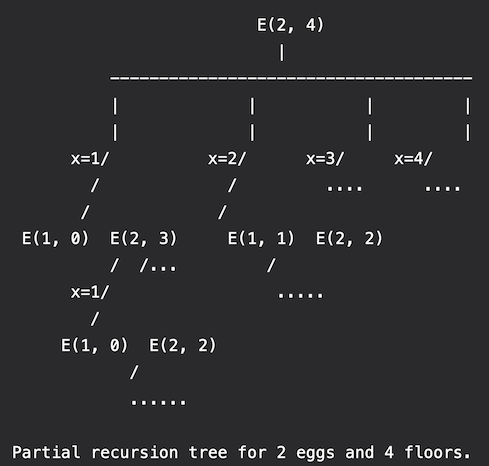


(image source: https://www.geeksforgeeks.org/egg-dropping-puzzle-dp-11/)


* Time complexity: Exponential time, O(2<sup>k</sup>), where `k` = number of floors, since there is a case of overlapping subproblems (additional ref: https://www.algotree.org/algorithms/dynamic_programming/egg_drop/).


* Space complexity: Auxilliary space is O(1) as no data structure is needed for storing values.


#### A case for dynamic programming:
As discussed above, the Egg Dropping puzzle satisfies both of the 2 main properties that suggest that the given problem could be solved using dynamic programming: 
* Optimal substructure. The optimal solution of the given problem could be obtained by using optimal solutions of its subproblems.
* Overlapping subproblems. Solutions of the same subproblems are needed again and again. 

Using dynamic programming, we could for example take a bottom-up approach and store the solutions of the common/repeated subproblems in an array. This way, when the solution to a common/repeated subproblem is needed, we could perform lookup from our stored array instead of recomputing via repeated/recursive function calls.


A dynamic progamming solution to the problem `eggDrop_dp()` was implemented and further discussed below.

### Implementation 

In [1]:
# imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# method: dynamic programming
# source: https://www.geeksforgeeks.org/egg-dropping-puzzle-dp-11/

INT_MAX = 32767
 
# Function to get minimum number of trials needed in worst
# case with n eggs and k floors
def eggDrop_dp(n, k):
    # A 2D table where entry eggFloor[i][j] will represent minimum
    # number of trials needed for i eggs and j floors.
    eggFloor = [[0 for x in range(k + 1)] for x in range(n + 1)]
 
    # We need one trial for one floor and0 trials for 0 floors
    for i in range(1, n + 1):
        eggFloor[i][1] = 1
        eggFloor[i][0] = 0
 
    # We always need j trials for one egg and j floors.
    for j in range(1, k + 1):
        eggFloor[1][j] = j
 
    # Fill rest of the entries in table using optimal substructure
    # property
    for i in range(2, n + 1):
        for j in range(2, k + 1):
            eggFloor[i][j] = INT_MAX
            for x in range(1, j + 1):
                res = 1 + max(eggFloor[i-1][x-1], eggFloor[i][j-x])
                if res < eggFloor[i][j]:
                    eggFloor[i][j] = res
 
    # eggFloor[n][k] holds the result
    return eggFloor[n][k]

#### Solving the problem using dynamic programming:

* The above implementation uses a tabulation (bottom up) approach. The solutions to common/repeated subproblems are stored in an array of size `(n + 1) * (k + 1)`, where `n` = # eggs and `k` = # floors. (An extra row and column for 0 eggs and 0 floors.)


* Base cases: 
    * For 1 egg and `j` floors, we need `j` trials, as discussed above.
    * For 0 floor we need 0 trial.
    * For 1 floor we need 1 trial.
    

* For other scenarios (the remaining cells in the array), the strategy is to iterate each floor `x` from 1 to `j` and find the minimum of: `(1 + max(arr[i-1][x-1], arr[i][j-x])`, where `arr` is the array that holds the solutions to the subproblems.


* Example: `n` = 3, `k` = 6
    * Make a `(n + 1) * (k + 1)` grid and fill in solutions to the base cases. Fill in the rest of the cells with some large value `INT_MAX`.
    * Update the cells that are not the base case.
    * Start with `arr[2, 2]`. Iterate each floor `x` from 1 to `j`.
        * Floor 1 (x = 1): 1 + max(`arr[1, 0]`, `arr[2, 1]`) = 1 + max(0, 1) = 2
        * Floor 2 (x = 2): 1 + max(`arr[1, 1]`, `arr[2, 0]`) = 1 + max(1, 0) = 2
        * `arr[2, 2]` = min(2, 2) = 2
    * Move onto the next cell in `arr` until the whole array/table is filled.

* Time complexity: O(n `*` k<sup>2</sup>), where `n` = the number of eggs and `k` = number of floors. A nested for loop was used k<sup>2</sup> times for each egg.


* Space complexity: Auxiliary  space required is O(n `*` k) since an array of size n `*` k is used to store elements.


* This is a dynamic programming solution because it breaks down the problem into subproblems and solves those subproblems first. Common/repeated subproblems are solved once, and the results are stored so that they could be looked up instead of recomputed when needed later.

In [3]:
# method: recursion (for comparative analysis)
# source: https://www.geeksforgeeks.org/egg-dropping-puzzle-dp-11/

# Function to get minimum number of trials
# needed in worst case with n eggs and k floors
def eggDrop_rec(n, k):
 
    # If there are no floors, then no trials
    # needed. OR if there is one floor, one
    # trial needed.
    if (k == 1 or k == 0):
        return k
 
    # We need k trials for one egg
    # and k floors
    if (n == 1):
        return k
 
    min = sys.maxsize
 
    # Consider all droppings from 1st
    # floor to kth floor and return
    # the minimum of these values plus 1.
    for x in range(1, k + 1):
 
        res = max(eggDrop_rec(n - 1, x - 1),
                  eggDrop_rec(n, k - x))
        if (res < min):
            min = res
 
    return min + 1

### Run implementation

In [4]:
# run the dynamic programming implemention 
# record the solutions to a range of scenarios, printing the outputs
kk = 20 # set # floors
for nn in [2, 4, 8, 16]: # set # eggs
    print('Minimum number of trials in worst case with ' + str(nn) + ' eggs and ' 
          + str(kk) + ' floors is ' + str(eggDrop_dp(nn, kk)))

Minimum number of trials in worst case with 2 eggs and 20 floors is 6
Minimum number of trials in worst case with 4 eggs and 20 floors is 5
Minimum number of trials in worst case with 8 eggs and 20 floors is 5
Minimum number of trials in worst case with 16 eggs and 20 floors is 5


In [5]:
# experiment: solve problem for different # eggs 
# use dynamic programming vs. recursion and get mean execution times
expt_ns, expt_ks, expt_ts_dp, expt_ts_rec = [[] for xx in range(4)]
kk = 20 # set # floors
for nn in [2, 4, 8, 16]:
    # print(nn)
    # dynamic programming
    res = %timeit -qor 3 eggDrop_dp(nn, kk)
    expt_ts_dp.append(res.average)
    
    # recursion
    if nn <= 4:
        res = %timeit -qor 3 eggDrop_rec(nn, kk)
        expt_ts_rec.append(res.average)
    else:
        expt_ts_rec.append(np.nan)
        # print('recursion skipped')
    
    expt_ns.append(nn)
    expt_ks.append(kk)

# comparative analysis table
# n: # eggs, k: # floors, dp: mean execution time, dynamic programming, rec: mean execution time, recursion
df1 = pd.DataFrame({'n':expt_ns, 'k':expt_ks, 
                    'dp':np.array(expt_ts_dp)*1000, 
                    'rec':np.array(expt_ts_rec)*1000})
# experiment output
# did not run recursive solution for larger problem sizes due to very long execution times (set to NaN)
df1

,n,k,dp,rec
0,2,20,0.068211,330.508361
1,4,20,0.194498,15116.092653
2,8,20,0.450930,NaN
3,16,20,0.955899,NaN


In [6]:
# experiment: solve problem for different # floors
# use dynamic programming vs. recursion and get mean execution times
expt_ns, expt_ks, expt_ts_dp, expt_ts_rec = [[] for xx in range(4)]
nn = 2 # set # eggs
for kk in [10, 20, 40, 80, 160]:
    # print(kk)
    # dynamic programming
    res = %timeit -qor 3 eggDrop_dp(nn, kk)
    expt_ts_dp.append(res.average)
    
    # recursion
    if kk <= 20:
        res = %timeit -qor 3 eggDrop_rec(nn, kk)
        expt_ts_rec.append(res.average)
    else:
        expt_ts_rec.append(np.nan)
        # print('recursion skipped')
    
    expt_ns.append(nn)
    expt_ks.append(kk)

# comparative analysis table
# n: # eggs, k: # floors, dp: mean execution time, dynamic programming, rec: mean execution time, recursion
df2 = pd.DataFrame({'n':expt_ns, 'k':expt_ks, 
                    'dp':np.array(expt_ts_dp)*1000, 
                    'rec':np.array(expt_ts_rec)*1000})
# experiment output
# did not run recursive solution for larger problem sizes due to very long execution times (set to NaN)
df2

,n,k,dp,rec
0,2,10,0.021427,0.328453
1,2,20,0.067788,332.566208
2,2,40,0.242544,NaN
3,2,80,0.917803,NaN
4,2,160,3.571729,NaN


### Analysis

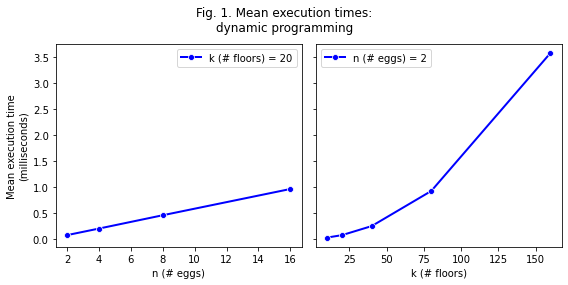

In [7]:
# plot results: dynamic programming
fig, axs = plt.subplots(1,2, figsize=(8, 4), sharey=True)
sns.lineplot(data=df1, y='dp', x='n', color='b', marker='o', lw=2, ax=axs[0], label='k (# floors) = 20')
sns.lineplot(data=df2, y='dp', x='k', color='b', marker='o', lw=2, ax=axs[1], label='n (# eggs) = 2')
axs[0].set(xlabel='n (# eggs)')
axs[1].set(xlabel='k (# floors)')
for ax in axs:
    ax.set_ylabel('Mean execution time\n(milliseconds)')
fig.tight_layout()
plt.suptitle('Fig. 1. Mean execution times:\ndynamic programming')
plt.subplots_adjust(top=0.85)
plt.show()

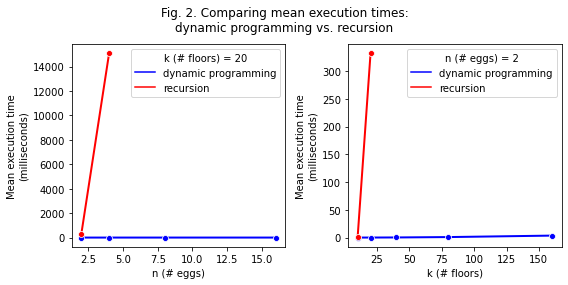

In [8]:
# plot results: dynamic programming vs. recursion
df1m = df1.melt(id_vars=['n', 'k'])
df2m = df2.melt(id_vars=['n', 'k'])
df1m['variable'].replace({'dp':'dynamic programming', 'rec':'recursion'}, inplace=True)
df2m['variable'].replace({'dp':'dynamic programming', 'rec':'recursion'}, inplace=True)

fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.lineplot(data=df1m, y='value', x='n', hue='variable', marker='o', lw=2, 
             palette=['b', 'r'], ax=axs[0])
sns.lineplot(data=df2m, y='value', x='k', hue='variable', marker='o', lw=2, 
             palette=['b', 'r'], ax=axs[1])
axs[0].set(xlabel='n (# eggs)')
axs[1].set(xlabel='k (# floors)')
for ax in axs:
    ax.set_ylabel('Mean execution time\n(milliseconds)')
fig.tight_layout()
plt.suptitle('Fig. 2. Comparing mean execution times:\ndynamic programming vs. recursion')
plt.subplots_adjust(top=0.85)
axs[0].legend(title='k (# floors) = 20')
axs[1].legend(title='n (# eggs) = 2')
plt.show()

#### Experiments ran
A dynamic programming method was used to solve the Egg Dropping Puzzle. Mean execution times were compared against a recursion method. Two sets of experiments were performed to assess the effect of changing `n`, the number of eggs, and `k`, the number of floors in the building, on mean execution time:
* Solving the problem for different # eggs. `n` was varied from 2 to 16 and `k` was set at 20.
* Solving the problem for different # floors. `n` was set at 2 and `k` was varied from 10 to 160.

#### Results
* Fig. 1: dynamic programming
    * Mean execution time scaled linearly with the number of eggs `n`. For example, when `n` doubled from 8 to 16 execution time was ~2x.
    * Mean execution time scaled quadratically with the number of floors `k`. For example, when `k` doubled from 80 to 160 execution time was ~4x.
    * These results are consistent with the dynamic programming time complexity of O(n `*` k<sup>2</sup>)


* Fig. 2: dynamic programming vs. recursion
    * For the same set of input variables, mean execution time using recursion was much longer than using dynamic programming This result was expected because using dynamic programming, solutions to common subproblems did not have to be calculated repeatedly; every subproblem was solved once and the solution was cached. 
    * The recursion method did not scale well with problem size (input variables). Here, it was impractical to evaluate the recursion method on problems with (>4 eggs, 20 floors) or (2 eggs, >20 floors) due to long running times. 
    * Mean execution time using recursion scaled worse than using dynamic programming, a result that is consistent with their respective aforementioned time complexities.


* The dynamic programming method provided the optimal solution to this problem (not just an approximate solution). It was also faster than using recursion. Therefore, short of exploring another dynamic programming method--using memoization instead of tabulation, I believe that it is the best solution to the selected problem.    

#### Conclusions

* The Egg Dropping Puzzle is a good use case for dynamic programming because it has optimal substructure and it consists of overlapping subproblems. (It satisfies the 2 main properties of a dynamic programming problem.) The dynamic programming solution implemented here has a time complexity of O(n `*` k<sup>2</sup>), which scales better than a recursion method, which has exponential time complexity. 


* The experiments show that the dynamic programming method was indeed much faster and scales better than recursion. 


* Recognizing problems for which dynamic programming would or would not be successful is a useful skill for data engineers. Example limitations:
    * "Dynamic programming only works when each subproblem is discrete—when it doesn’t depend on other subproblems" (Bhargava, 2016).
    * "Dynamic Programming is not useful when there are no common (overlapping) subproblems because there is no point storing the solutions if they are not needed again" (e.g. binary search) (ref: https://www.geeksforgeeks.org/overlapping-subproblems-property-in-dynamic-programming-dp-1/).  


* While there is no single formula for calculating a dynamic programming solution, it is useful to remember that every dynamic programming solution involves a grid, each cell is a subproblem, and that the values in the cells are usually what we are trying to optimize (Bhargava, 2016). 

#### References
* Bhargava, A. Y. (2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.
* Additional web references are cited in-text.